In [2]:
%matplotlib widget

In [46]:
from BIOViewer import EventViewer
from BIOViewer import EventConfig
import os
import pandas as pd
import numpy as np
import sys
sys.path.append('../../Scripts')
from local_utils import all_referential, cut_and_jitter
from make_datamodule import datamoduleClemson
from local_utils import remove_channels, build_montage,normalize, cut_and_jitter, Config


In [47]:
def get_transforms(montage_channels,storage_channels,windowsize,windowjitter,Fq):
   montage = build_montage(montage_channels,storage_channels)
   cutter = cut_and_jitter(windowsize,windowjitter,Fq)
   transforms = [montage,cutter,normalize]
   print('keeping all channels')
   return transforms

In [48]:
dataloader = datamoduleClemson(batch_size=1).test_dataloader()

In [49]:
class loader_visualizer():
    def __init__ (self,dataloader):
        self.dataloader = dataloader
    def __call__(self,idx):
        x,y = next(iter(dataloader))
        return x[0,:,:]

In [60]:
x = loader_visualizer(dataloader)
Fs = 128
channels = all_referential
scale = 10
windowsize = 10

In [61]:
transforms = get_transforms(all_referential,all_referential,10,0,128)

keeping all channels


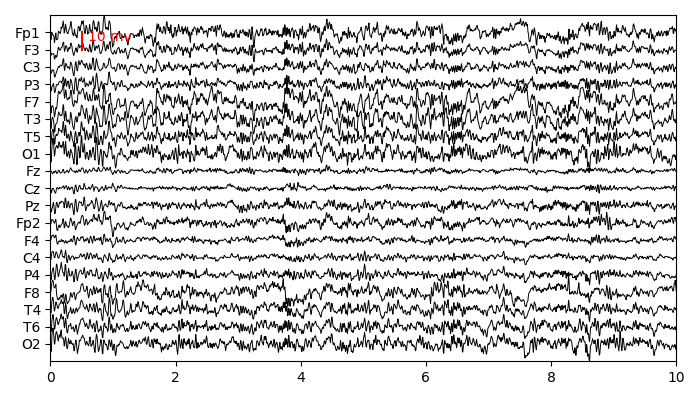

In [62]:
signalconfig = EventConfig([0]*1000,x,Fs,channels,scale= scale,unit='mv',transforms=None)
viewer = EventViewer(signal_configs=[signalconfig],windowsize=windowsize)